# when you need to compare more than 2 groups - use ANOVA

If you instead performed multiple t tests betweeen the different groups you would increase the likelyhood of a false positive

In [215]:
from sklearn import datasets
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols


iris = datasets.load_iris()
df = pd.DataFrame(iris.data, 
                  columns=[i[0] + i[6] for i in iris.feature_names])

#iris.feature_names


# Add the target variable to the dataframe
df['target'] = iris.target + 1
df["target"] = df["target"].astype("category")

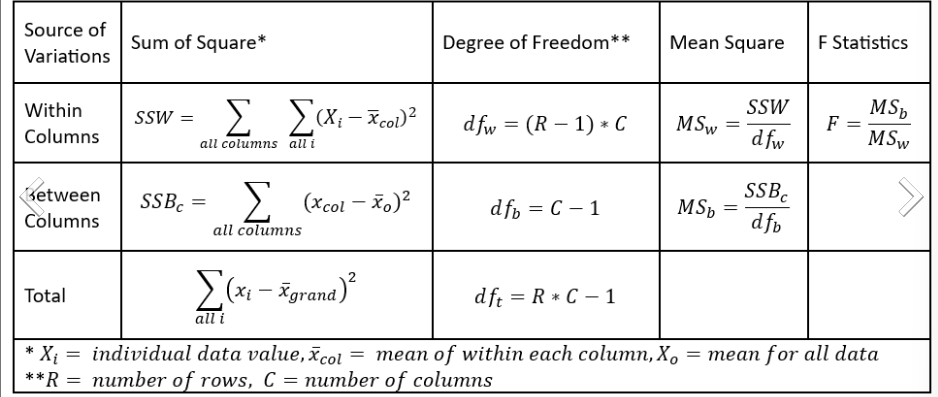

In [199]:
# groups = [s0,s1,s2]

# def SS_within(groups):
#     output = 0
#     for x in groups:
#         x_ = np.mean(x)
#         output += np.sum((x-x_)**2)
#     return output

# ssw = SS_within(groups)
# dfw = (len((groups[0]))-1) * len(groups)
# msw = ssw/dfw

# ssbc = np.sum(([np.mean(i) for i in groups] - np.mean(np.hstack(groups)))**2)
# dfb = len(groups)-1
# msb = ssbc/dfb

# print(f"ssw:{ssw},dfw:{dfw},msw:{msw},ssbc:{ssbc},dfb:{dfb},msb:{msb}")

# F = msb/msw
# print(F)

In [158]:
# x1/a1 + x2/a2 + x3/a3 != x1 + x2 + x3/(a1 + a2 + a3)
# interpretation sum of 3 averages versus average across all 3 groups

In [232]:
# transform
df["sl_"] = df.groupby("target")["sl"].transform(lambda x: np.mean(x))
df["sl_residual"] = (df["sl"] - df["sl_"])**2
ssw = df["sl_residual"].sum()
ssw


((df.groupby("target")["sl"].mean() - df["sl"].mean())**2 * df.groupby("target")["sl"].count()).sum()

63.212133333333256

# scipy

In [220]:
from scipy.stats import f_oneway

f_oneway(*groups)

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

# Statsmodels

In [219]:
# Fit the model
model = ols('sl ~ target', data=df).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)


             sum_sq     df           F        PR(>F)
target    63.212133    2.0  119.264502  1.669669e-31
Residual  38.956200  147.0         NaN           NaN


In [210]:
model.params

Intercept   -2.523982
sl           0.774212
dtype: float64